# **Алгоритмы в биоинформатике**.</br> Домашнее задание 4. Зарубин Дмитрий.
> Постройте скрытую марковскую модель для поиска сайта рестрикции ACGT. Переходные вероятности из сайта и из фона в конец последовательности равны: a(Bg → E) = a(site → E)= 0.01. Переходная вероятность из фона в сайт равна  a(Bg → site)=0.01. Эмиссионные вероятности фона все равны 0.25.



**1. Нарисуйте автомат для модели** (0.05 балла)
</br>**2. Восстановите недостающие вероятности** (0.05 балла)



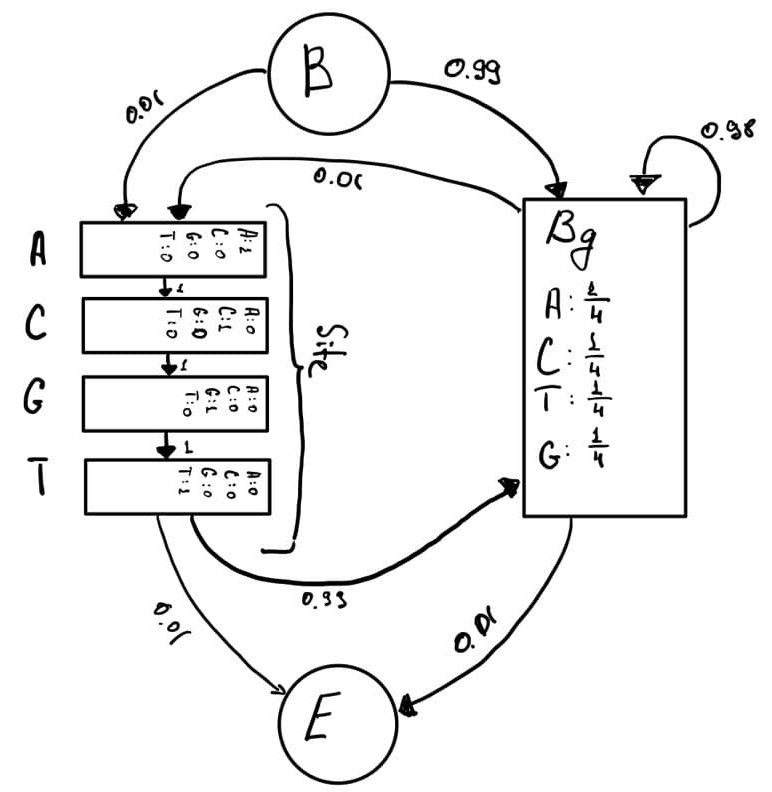

**3. Напишите программу на Python, реализующие алгоритм Витерби для этой модели.** (5 баллов) 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seq = 'gataggattatcattcataagtttcagagcaatgtccttattctggaacttggatttatggctcttttggtttaatttcgcctgattcttgatctcctttagcttctcgacgtgggcctttttcttgccatatggatccgctgcacggtcctgttccctagcatgtacgtgagcgtatttccttttaaaccacgacgctttgtcttcattcaacgtttcccattgtttttttctactattgctttgctgtgggaaaaacttatcgaaagatgacgactttttcttaattctcgttttaagagcttggtgagcgctaggagtcactgccag'

In [ ]:
def convert_to_num(V):
    v_int = ''
    for i in V:
        if i == 'a':
            v_int += '0'
        elif i == 'c':
            v_int += '1'
        elif i == 'g':
            v_int += '2'
        elif i == 't':
            v_int += '3'
        v_int = list(v_int)
        v_int = [int(i) for i in v_int]
    return np.array(v_int)

In [ ]:
#Decoding letters as numbers (было лень делать словарь из словарей, для задания матриц переходов и эмиссий)
V = convert_to_num(seq)

In [ ]:
# a - Transition probabilities
a = np.array(# | B | BG | A | C | G | T | E |
            (   [0, .99, .01, 0,  0,  0,  0],#B
                [0, .98, .01, 0,  0,  0, .01],#BG
                [0,  0,   0,  1,  0,  0,  0 ],#A
                [0,  0,   0,  0,  1,  0,  0 ],#C
                [0,  0,   0,  0,  0,  1,  0 ],#G
                [0, .99,  0,  0,  0,  0, .01],#T
                [0,  0,   0,  0,  0,  0,  0 ]))#E

# b - Emission probs
b = np.array(#| A | C | G | T |
            ( [ 0,  0,  0,  0 ],#B
              [.25, .25, .25, .25],#BG
              [ 1,  0,  0,  0 ],#A
              [ 0,  1,  0,  0 ],#C
              [ 0,  0,  1,  0 ],#G
              [ 0,  0,  0,  1 ],#T
              [ 0,  0,  0,  0 ]))#E

In [ ]:
def viterbi(V, a, b):
    T = len(V)
    M = a.shape[0]
 
    omega = np.zeros((T, M))
    omega[0, :] = np.log(a[0] * b[:, V[0]])
 
    prev = np.zeros((T - 1, M))
 
    for t in range(1, T):
        for j in range(M):
            # Same as Forward Probability
            probability = omega[t - 1] + np.log(a[:, j]) + np.log(b[j, V[t]])
 
            # This is our most probable state given previous state at time t (1)
            prev[t - 1, j] = np.argmax(probability)
 
            # This is the probability of the most probable state (2)
            omega[t, j] = np.max(probability)
 
    # Path Array
    S = np.zeros(T)
 
    # Find the most probable last hidden state
    last_state = np.argmax(omega[T - 1, :])
 
    S[0] = last_state
 
    backtrack_index = 1
    for i in range(T - 2, -1, -1):
        S[backtrack_index] = prev[i, int(last_state)]
        last_state = prev[i, int(last_state)]
        backtrack_index += 1
 
    # Flip the path array since we were backtracking
    S = np.flip(S, axis=0)

    # Convert numeric values to actual hidden states
    result = []
    for s in S:
        if s == 1:
            result.append("BG")
        elif s in [2,3,4,5]:
            result.append("S") 
    return result

In [ ]:
def find_sites(states, V, a, b):
    result = []
    states = viterbi(V, a, b)
    for index, state in enumerate(states):
        if state == 'S':
            result.append(index)
    for i in range(0, len(result), 4):
        print(f'\nSite : {seq[result[i:i+4][0]:result[i:i+4][-1]+1]}\nStart : {result[i:i+4][0]}\nStop : {result[i:i+4][-1]}\n')

Проверьте, что:</br>
**3.1	Программа находит правильные сайты.**

In [ ]:
states = viterbi(V, a, b)
find_sites(states, V, a, b)


Site : acgt
Start : 109
Stop : 112


Site : acgt
Start : 166
Stop : 169


Site : acgt
Start : 212
Stop : 215



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


**3.2 Замените вероятности перехода из фона в сайта значения a(Bg → site)=0.001 и проверьте, как в этом случае находятся сайты**

In [ ]:
# a - Transition probabilities
a = np.array(# | B | BG | A | C | G | T | E |
            (   [0, .99, .01, 0,  0,  0,  0],#B
                [0, .989, .001, 0,  0,  0, .01],#BG
                [0,  0,   0,  1,  0,  0,  0 ],#A
                [0,  0,   0,  0,  1,  0,  0 ],#C
                [0,  0,   0,  0,  0,  1,  0 ],#G
                [0, .99,  0,  0,  0,  0, .01],#T
                [0,  0,   0,  0,  0,  0,  0 ]))#E

In [ ]:
states = viterbi(V, a, b)
find_sites( states, V, a, b)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


> При изменении переходной вероятности из фона в сайт на 0.001, программа совсем не находит сайтов в последовательности ($\rightarrow$малое правдоподобие)

**4. Напишите программу для алгоритма Forward-Backward. Посмотрите как она работает на разных вероятностях перехода a(Bg → site)  и постройте графики для вероятностей сайта и фона** (5 баллов).

In [ ]:
def forward(V, a, b):

    alpha = np.zeros((len(V), a.shape[0]))
    alpha[0, :] = a[0] * b[:, 0]
    #a = a[1:]
    #b = b[1:]
 
    for t in range(1, len(V)):
        for j in range(1, a.shape[0]):
            # Matrix Computation Steps
            #                  ((1x2) . (1x2))      *     (1)
            #                        (1)            *     (1)
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]
 
    return alpha

In [ ]:
 def F_B(V, a, b):
    alpha = np.zeros((len(V), a.shape[0]))
    alpha[0, :] = a[0] * b[:, 0]
    #a = a[1:]
    #b = b[1:]
 
    for t in range(1, len(V)):
        for j in range(1, a.shape[0]):
            # Matrix Computation Steps
            #                  ((1x2) . (1x2))      *     (1)
            #                        (1)            *     (1)
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]
    
    beta = np.zeros((len(V), a.shape[0]))
 
    # setting beta(T) = 1
    beta[len(V) - 1] = np.ones((a.shape[0]))
 
    # Loop in backward way from T-1 to
    # Due to python indexing the actual loop will be T-2 to 0
    for t in range(len(V) - 2, -1, -1):
        for j in range(a.shape[0]):
            beta[t, j] = (beta[t + 1] * b[:, V[t + 1]]).dot(a[j, :])
    
    site_probs = []
    for i in range(len(V) - 1):
        site_probs.append(1 - alpha[i][1] * beta[i][1] / alpha[len(V)-1][1])
    return site_probs

In [ ]:
probabilities1 = F_B(V, a, b)

a2 = np.array(# | B | BG | A | C | G | T | E |
            (   [0, .99, .01, 0,  0,  0,  0],#B
                [0, .989, .001, 0,  0,  0, .01],#BG
                [0,  0,   0,  1,  0,  0,  0 ],#A
                [0,  0,   0,  0,  1,  0,  0 ],#C
                [0,  0,   0,  0,  0,  1,  0 ],#G
                [0, .99,  0,  0,  0,  0, .01],#T
                [0,  0,   0,  0,  0,  0,  0 ]))#E

probabilities2 = F_B(V, a2, b)

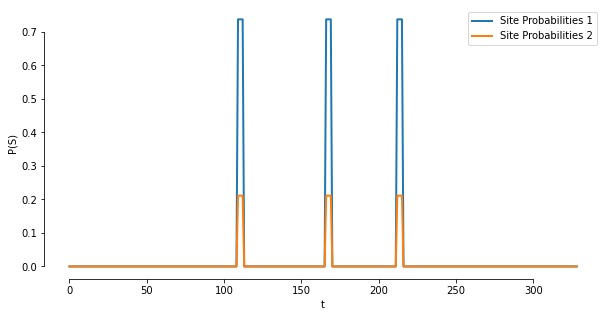

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(probabilities1, lw=2, label=f'Site Probabilities 1')
plt.plot(probabilities2, lw=2, label=f'Site Probabilities 2')
plt.legend()
sns.despine(trim=True)
plt.xlabel('t')
plt.ylabel('P(S)')
plt.show()

**5. Напишите программу генерации последовательности для этой модели** (2 балла)

In [ ]:
Tr = {'B' : [0, .99, .01, 0,  0,  0,  0],
      'BG' : [0, .98, .01, 0,  0,  0, .01],
      'A' : [0,  0,   0,  1,  0,  0,  0],
      'C' : [0,  0,   0,  0,  1,  0,  0],
      'G' : [0,  0,   0,  0,  0,  1,  0],
      'T' : [0, .99,  0,  0,  0,  0, .01], 
      'E' : [0,  0,   0,  0,  0,  0,  0]}
Em = {'B' : [ 0,  0,  0,  0],
      'BG' : [.25, .25, .25, .25],
      'A' : [1,  0,   0,  0],
      'C' : [0,  1,   0,  0],
      'G' : [0,  0,   1,  0],
      'T' : [0,  0,   0,  1], 
      'E' : [0,  0,   0,  0]}

In [ ]:
from random import choices

States = list(Tr.keys())

Emissions = list(Em.keys())

def generate_sample(current_state, states, probs):
    return choices(population=states, weights=probs[current_state], k=1)

state = ['B']
sequence = []
i=0
while state[-1] != 'E':
    i += 1
    state.append(generate_sample(state[-1], States, Tr)[0])
    sequence.append(generate_sample(state[-1], ['A', 'C', 'G', 'T'], Em)[0])

In [ ]:
# Generated States
print(*state)

B BG BG BG BG BG BG BG BG BG BG BG BG BG BG BG BG BG BG BG BG BG BG BG BG BG A C G T BG BG BG BG BG BG BG BG BG BG BG BG BG BG E


In [ ]:
# Generated Sequnece
print(*sequence)

G C G T C C A G C A A C G C T A A C A T A G C T T A C G T T T G C A T A T T A T A C C T
